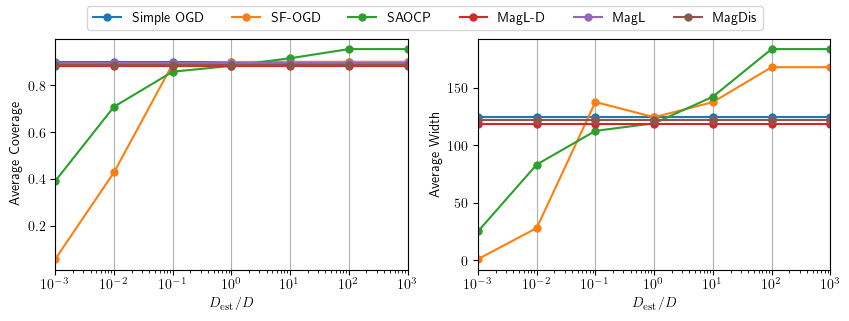

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Load the saved arrays
data = np.load("hyperparam_results.npz", allow_pickle=True)
methods = data['methods']
D_list = data['D_list']
avg_cov = data['avg_cov']
avg_width = data['avg_width']

# do the plotting

metrics = ["Coverage", "Avg. Width", "Avg. Miscoverage", "Avg. Regret"]

methods_abbr = ["SimpleOGD", "ScaleFreeOGD", "SAOCP", "SplitConformal", "NExConformal", "FACI", "FACI_S", "MagnitudeLearner", "MagLearnUndiscounted", "MagnitudeLearnerV2"]
D = np.array([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])

learning_methods = ["Simple OGD", "SF-OGD", "SAOCP", "SplitConformal", 
                    "NExConformal", "FACI", "FACI-S", "MagL-D", "MagL", "MagDis"]


# Indices to plot
idx_toplot = [methods_abbr.index(m) for m in ["SimpleOGD","ScaleFreeOGD", "SAOCP", "MagnitudeLearner", "MagLearnUndiscounted", "MagnitudeLearnerV2"]]

plt.rcParams["text.usetex"] = True
# Setting up the matplotlib figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plotting settings
marker_size = 5
line_style = 'o-'
# Subplot 1: Average Coverage, full data
for i in idx_toplot:
    method = methods_abbr[i]
    axs[0].semilogx(D, avg_cov[:,i], line_style, markersize=marker_size, label=learning_methods[i])
# axs[0, 0].set_ylabel("Average\nCoverage")
axs[0].set_ylabel("Average Coverage")
axs[0].xaxis.grid(True)
axs[0].set_xticks(D)
axs[0].set_xlim([1e-3, 1e3])
#axs[0].set_title("Full $y$-axis")
axs[0].set_xlabel('$D_{\mathrm{est}} / D$')

# Subplot 2: Average Width, full data
for i in idx_toplot:
    method = methods_abbr[i]
    axs[1].semilogx(D, avg_width[:,i], line_style, markersize=marker_size)
# axs[1, 0].set_ylabel("Average\nWidth")
axs[1].set_ylabel("Average Width")
axs[1].xaxis.grid(True)
axs[1].set_xticks(D)
axs[1].set_xlim([1e-3, 1e3])
axs[1].set_xlabel('$D_{\mathrm{est}} / D$')

# # Subplot 3: Average Coverage, zoomed y-axis
# for i in idx_toplot:
#     method = methods_abbr[i]
#     axs[0, 1].semilogx(D, avg_cov[:,i], line_style, markersize=marker_size)
# axs[0, 1].set_xticks(D)
# axs[0, 1].xaxis.grid(True)
# axs[0, 1].set_xlim([1e-3, 1e3])
# axs[0, 1].set_ylim([0.895, 0.905])
# # axs[0, 1].set_ylabel("Average\nCoverage")
# axs[0, 1].set_ylabel("Average Coverage")
# axs[0, 1].set_title("Zoomed $y$-axis")

# # Subplot 4: Average Width, zoomed y-axis
# for i in idx_toplot:
#     method = methods_abbr[i]
#     axs[1, 1].semilogx(D, avg_width[:,i], line_style, markersize=marker_size)
# axs[1, 1].set_xticks(D)
# axs[1, 1].xaxis.grid(True)
# axs[1, 1].set_xlim([1e-3, 1e3])
# axs[1, 1].set_ylim([120, 150])
# # axs[1, 1].set_ylabel("Average\nWidth")
# axs[1, 1].set_ylabel("Average Width")
# axs[1, 1].set_xlabel('$D_{\mathrm{est}} / D$')

# Additional settings for the overall figure
#fig.suptitle("Radius Prediction for TinyImageNet", fontsize=16)
#plt.subplots_adjust(bottom=0.15)
# plt.subplots_adjust(top=0.9)
# plt.subplots_adjust(bottom=0)
#plt.margins(1)

#plt.subplots_adjust(hspace=0.3)

# Correcting the legend indexing issue
learning_methods_to_plot = [learning_methods[i] for i in idx_toplot]
#fig.tight_layout()
# Redoing the legend part
fig.legend(learning_methods_to_plot, loc='upper center',ncol=6)

# Show the plot
plt.show()
import os
__file__ = "hyperparameter_sensitivity.ipynb"
figdir = os.path.join(os.path.dirname(os.path.abspath(__file__)), "figures")
os.makedirs(figdir, exist_ok=True)
fig.savefig(os.path.join(figdir, "TinyImageNet_RadiusPrediction.pdf"),bbox_inches='tight', pad_inches=0.1)